In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import math
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression


In [92]:
def download_stock_csv(period1, period2, stock_name):
    href= "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history&includeAdjustedClose=true".format(stock_name,period1,period2)
    return pd.read_csv(href)

In [117]:
# get dataset from start period to now 
# get time stamp of start date and current date
# get data from yahoo finance link 
day = 12
month = 1
year = 2014
start_date = '{}.{}.{}'.format(day,month,year)
period1 = math.floor(datetime.strptime(start_date, '%d.%m.%Y').timestamp())
yesterday = (datetime.now()-timedelta(1)).timestamp()
period2 = math.floor(yesterday)
stock_name = 'BTC-USD'
stock_name = 'TSLA'

df  = download_stock_csv(period1, period2, stock_name)
df.fillna(method='ffill', inplace=True)

In [118]:
# get number of rows and columns in dataset
df.shape

(2265, 7)

In [119]:
# set date to index
# df.set_index('Date', inplace=True)
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2260,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2261,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2262,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220575900
2263,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
2264,2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500


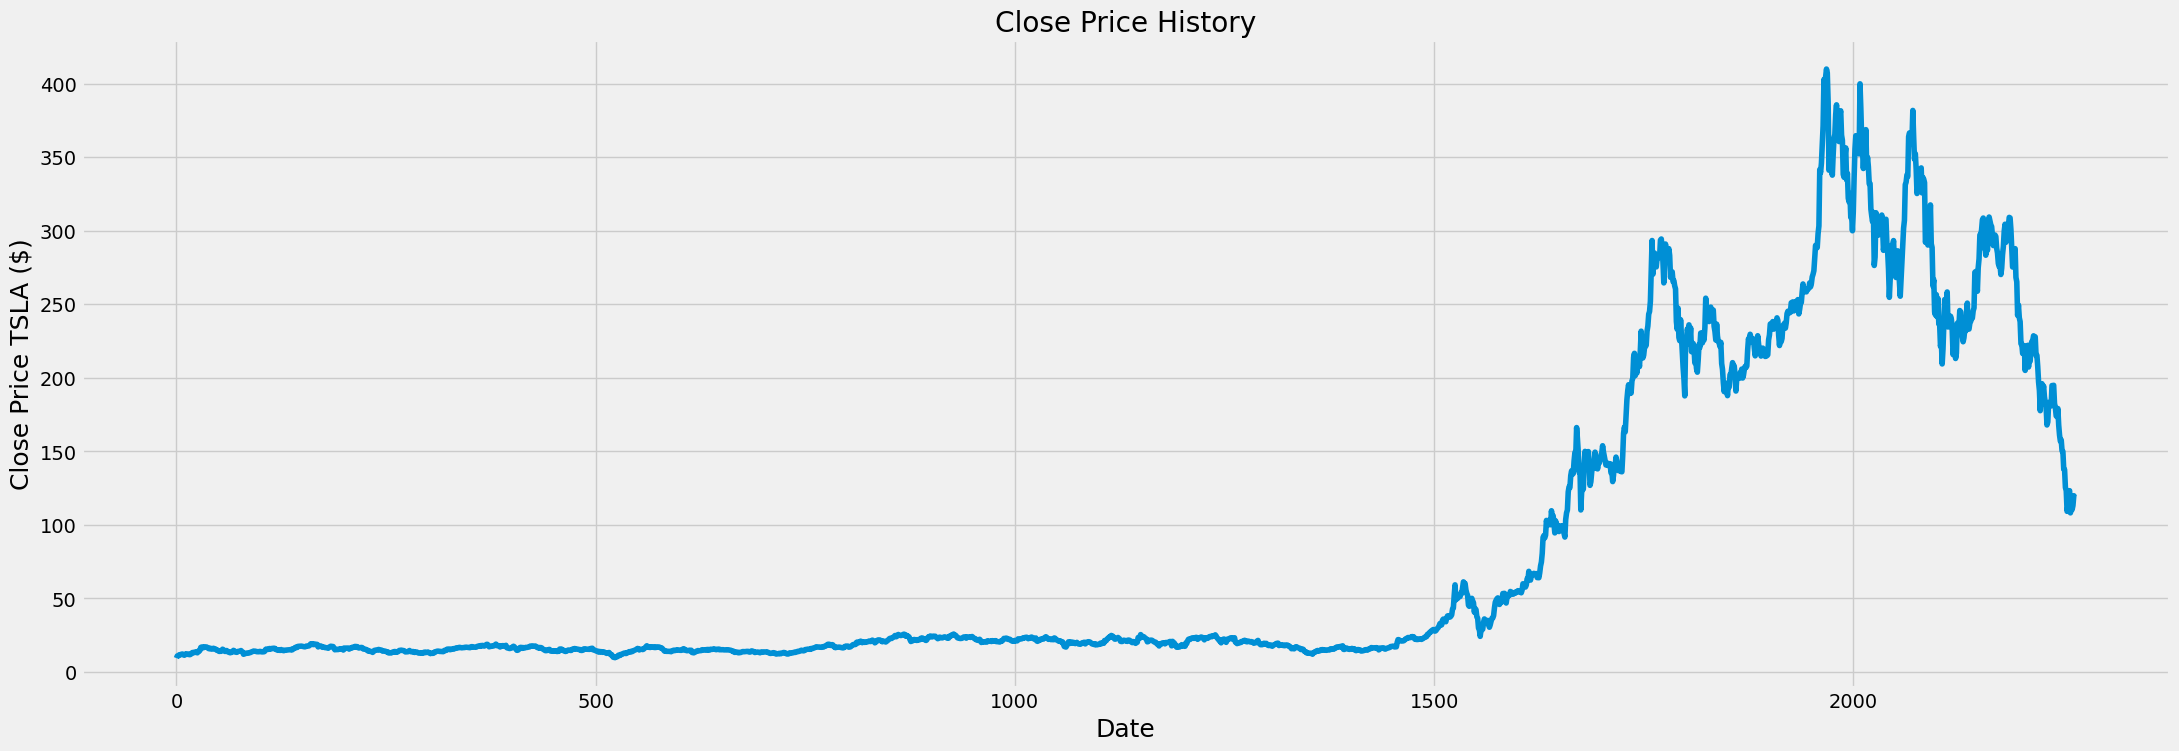

In [120]:
# visualize closing price history
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price {} ($)'.format(stock_name), fontsize=18)
plt.show()

In [121]:
# Create new dataframe with only close column
data = df.filter(['Close'])
# Convert data frame to np array
dataset = data.values
dataset_for_prediction = data.values

In [122]:
# scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
pre_data = 60

In [123]:
# split to train test
train_len = int(df.shape[0]*0.8)
train = scaled_data[0:train_len]
test = scaled_data[train_len-pre_data:]



In [124]:
# split into x_train and y_train
x_train = []
y_train = []
for i in range(pre_data, len(train)):
    x_train.append(train[i-pre_data:i,0])
    y_train.append(train[i,0])

In [103]:
# convert train sets to np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [125]:
# use linear regression to predict the price
reg = LinearRegression().fit(x_train, y_train)


In [126]:
reg.score(x_train, y_train)

0.9978431924013055

In [127]:
# split test data in x and y

x_test = []
y_test = []

for i in range(pre_data, len(test)-1):
    x_test.append(test[i-pre_data:i,0])
    y_test.append(test[i,0])


In [128]:
# convert data to np array
x_test, y_test = np.array(x_test), np.array(y_test)


In [129]:
y_pred = reg.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0],1)
predictions = scaler.inverse_transform(y_pred)



In [130]:
res = pd.DataFrame( columns=['Real','Predictions'])
res['Predictions'] = predictions.reshape(x_test.shape[0],)
res['Real'] = dataset[train_len+1:].reshape(x_test.shape[0],)


In [131]:
# get mse
mse = mean_squared_error(res['Real'], res['Predictions'])
mse

262.57879372647125

In [132]:
rmse = np.sqrt(np.mean(res['Predictions']-res['Real'])**2)
rmse

3.7159795745003508

In [133]:
train_set = df[0:train_len]
valid = df[train_len+1:]

valid['Predictions'] = res['Predictions'].values
valid


/var/folders/t5/zf9yy08j4t7_d3z097nyksx00000gn/T/ipykernel_97634/173958123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = res['Predictions'].values


,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
1813,2021-03-26,213.956665,214.606674,199.963333,206.236664,206.236664,101558400,211.136950
1814,2021-03-29,205.213333,205.493332,198.673340,203.763336,203.763336,85911000,209.247249
1815,2021-03-30,200.583328,212.553329,197.003326,211.873337,211.873337,118297200,199.363792
1816,2021-03-31,215.539993,224.000000,213.703339,222.643326,222.643326,100011900,214.617306
1817,2021-04-01,229.456665,230.806671,219.806671,220.583328,220.583328,105895200,204.055310
...,...,...,...,...,...,...,...,...
2260,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,127.071464
2261,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,110.025569
2262,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220575900,120.801132
2263,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,113.048022


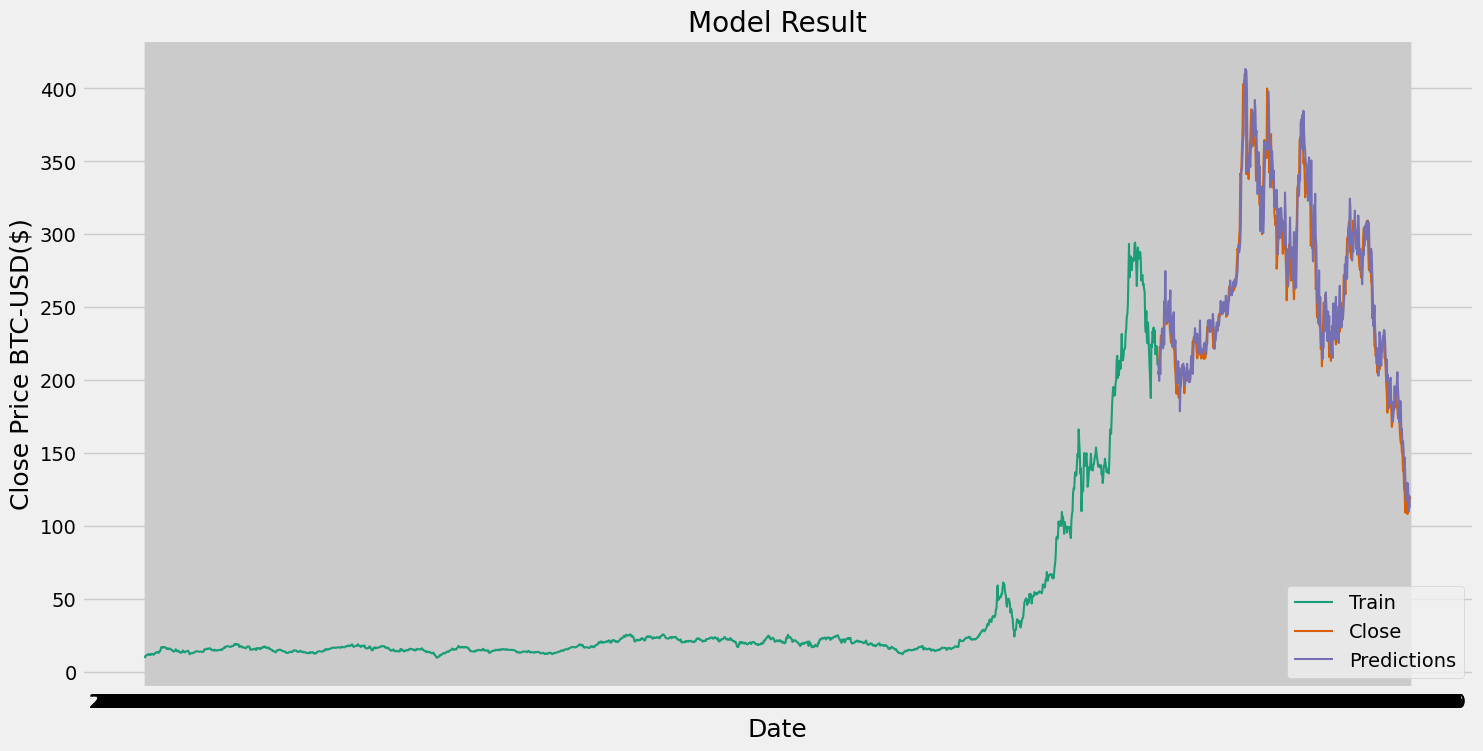

In [134]:
plt.figure(figsize=(16,8))
plt.title('Model Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BTC-USD($)', fontsize=18)
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]
plt.plot(train_set['Date'], train_set['Close'], color = COLORS[0], linewidth=1.5)
plt.plot(valid['Date'],valid['Close'], color = COLORS[1], linewidth=1.5)
plt.plot(valid['Date'], valid['Predictions'], color = COLORS[2], linewidth=1.5)
plt.legend(labels = ['Train', 'Close', 'Predictions'], loc='lower right')
plt.show()

In [87]:
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
1813,2021-03-26,152.203003,152.832993,149.800003,152.601501,152.601501,66258000,156.323266
1814,2021-03-29,152.772003,154.562500,151.422501,153.786499,153.786499,54920000,151.890941
1815,2021-03-30,153.500504,153.649994,151.699997,152.764496,152.764496,46752000,151.895594
1816,2021-03-31,153.203003,155.966507,153.125000,154.703995,154.703995,61878000,153.521043
1817,2021-04-01,155.897003,158.121994,155.777496,158.050003,158.050003,58806000,152.852334
...,...,...,...,...,...,...,...,...
2260,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,82.827600
2261,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,85.609251
2262,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83219100,87.184751
2263,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,83.001745


In [135]:
# predict for next tomorrow
for i in range(0, 30):
    next_day_test = scaled_data[-pre_data:]
    next_day_test = next_day_test.reshape(1,pre_data)
    nextday = reg.predict(next_day_test)
    nextday = nextday.reshape(nextday.shape[0],1)
    scaled_data = np.append(scaled_data, nextday.reshape(-1))
#     print(nextday)
#     nextday = scaler.inverse_transform(nextday)

# nextday.reshape(-1).shape
# scaled_data.shape

In [136]:
next_thirty = scaled_data[-30:].reshape(scaled_data[-30:].shape[0],1)
next_thirty = scaler.inverse_transform(next_thirty)


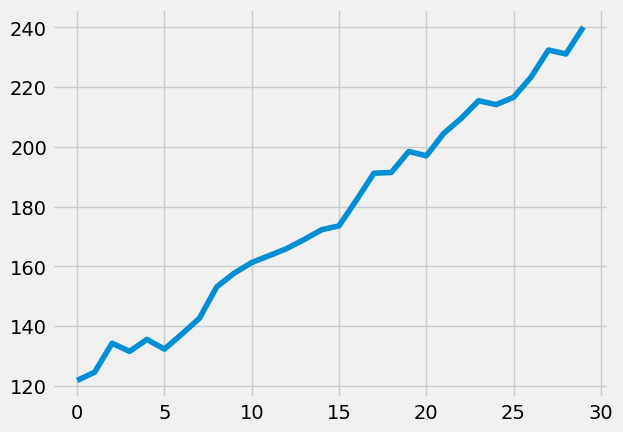

In [137]:
plt.plot(next_thirty)

In [67]:
next_thirty

array([[89.18090372],
       [89.73339397],
       [89.49630436],
       [89.69873259],
       [89.96135885],
       [89.72573274],
       [90.09647417],
       [89.92389997],
       [90.09278525],
       [90.12296508],
       [90.24170208],
       [90.10854073],
       [89.98986309],
       [90.05184005],
       [90.11919238],
       [90.26298958],
       [90.3307765 ],
       [90.42280702],
       [90.51208006],
       [90.60554709],
       [90.68456992],
       [90.77439741],
       [90.87604817],
       [90.96286033],
       [91.06416042],
       [91.16938245],
       [91.26903752],
       [91.35755423],
       [91.44175806],
       [91.52668216]])